<a href="https://colab.research.google.com/github/Latamila/ConsumoEnergiaSerieTemporal/blob/main/LSTM_GRU_CNN_Seriestemporais_multivariadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Long short term memory (lstm) é uma arquitetura de rede neural recorrente(RNN) que foi projetada para lidar com os problemas de dependencias de longo prazo e o desaparecimento do gradiente, que são comuns em RNNs tradicionais. Elas são especialmente úteis para tarefas envolvendo sequencias, como processamento de linguagem natural, reconhecimento de fala e series temporais.


A arquitetura lstm é composta de celulas de memoria, que sao os blocos básicos de uma lstm. Cada celula de memoria possui tres componentes principais: a unidade de memoria em si (tambem chamada de estado da celula) e tres portoes (input, forget e output) que controlam o fluxo de informações dentro da celula.

unidade de memoria(estado da celula): a unidade de memoria é uma representação interna que armazena informações ao longo do tempo. ela é atualizada conforme a sequencia de entrada é processada, permitindo que a lstm retennha informações relevantes de longo prazo e esqueça informações irrelevantes.

portão de entrada (input gate): o portao de entrada controla quais informações da entrada atual e do estado oculto anterior são permitidas para atualizar a unidade de memoria. O portao de entrada é uma combinação de duas partes: uma camada sigmoide que determina quais informações devem ser atualizadas e uma camada tanh que gera candidatos a serem adicionados ao estado da célula. A saida da camada sigmoide é multiplicada pela saida da camada tanh, e o resultado é adicionado à unidade de memória.

portão de esquecimento(forget gate): o portao de esquecimento determina quais informações do estado da célula atual devem ser esquecidas. ele usa uma camada sigmoide para calcular a importancia das informações no estado da celula. A saida da camada sigmoide é multiplicada pelo estado da celula, permitindo que a lstm esqueça seletivamente informações irrelevantes.

portao de saida(output gate):o portao de saida controla quais informações da unidade de memoria são transmitidas para o proximo estado oculto e para a camada seguinte na rede. ele usa uma sigmoide para calcular a importancia das informações na unidade de memoria e uma camada tanh para gerar uma versão normalizada do estado da celula. A saida da camada sigmoide é multiplicada pela saida da camada tanh, e o resultado é o novo estado oculto.

As lstm tem a capacidade de aprender dependencias de longo prazo e capturar informações relevantes em sequencias, tornando-as uma arquitetura popular para tarefas de processamento de sequencias. Existem diversas variantes e otimizações da arquitetura lstm, como as celulas GRU(gated recurrent unit) e as lstm bidirecionais.

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


In [2]:
!pip install -q tensorflow==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 49.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorflow-datasets 4.9.4 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.14.0 requires pro

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, explained_variance_score
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

tensorflow: 2.11.0
numpy     : 1.23.5
pandas    : 1.5.3
keras     : 2.11.0
seaborn   : 0.12.2
matplotlib: 3.7.1
plotly    : 5.15.0



In [7]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [8]:
df = pd.read_csv('dataset.csv')

In [9]:
df.shape

(124, 12)

In [10]:
df.head()

,data,petroleo_bruto,minerio_ferro,ouro,arroz,feijao,milho,soja,trigo,cafe,algodao,umidade
0,2012-12-01,323,455,3102.61,423.45,844.0,468.0,578.0,28.67,207.70504,117.7,79.261905
1,2013-01-01,345,546,3100.45,415.85,799.0,485.0,557.0,24.49,228.94287,4.5,82.193548
2,2013-02-01,362,595,3199.41,410.77,718.0,466.0,552.0,22.06,238.41747,25.1,74.839286
3,2013-03-01,376,636,3281.67,414.82,614.0,442.0,574.0,21.64,218.47599,53.6,77.935484
4,2013-04-01,383,738,3261.65,451.04,619.0,429.0,595.0,22.30,226.15010,166.0,80.450000


In [11]:
# Converte a coluna de data em índice
df.index = pd.to_datetime(df['data'], format = '%Y.%m.%d')

In [12]:
del df['data']

In [13]:
df.head()

,petroleo_bruto,minerio_ferro,ouro,arroz,feijao,milho,soja,trigo,cafe,algodao,umidade
data,,,,,,,,,,,
2012-12-01,323,455,3102.61,423.45,844.0,468.0,578.0,28.67,207.70504,117.7,79.261905
2013-01-01,345,546,3100.45,415.85,799.0,485.0,557.0,24.49,228.94287,4.5,82.193548
2013-02-01,362,595,3199.41,410.77,718.0,466.0,552.0,22.06,238.41747,25.1,74.839286
2013-03-01,376,636,3281.67,414.82,614.0,442.0,574.0,21.64,218.47599,53.6,77.935484
2013-04-01,383,738,3261.65,451.04,619.0,429.0,595.0,22.30,226.15010,166.0,80.450000


Text(0.5, 0, '\nData')

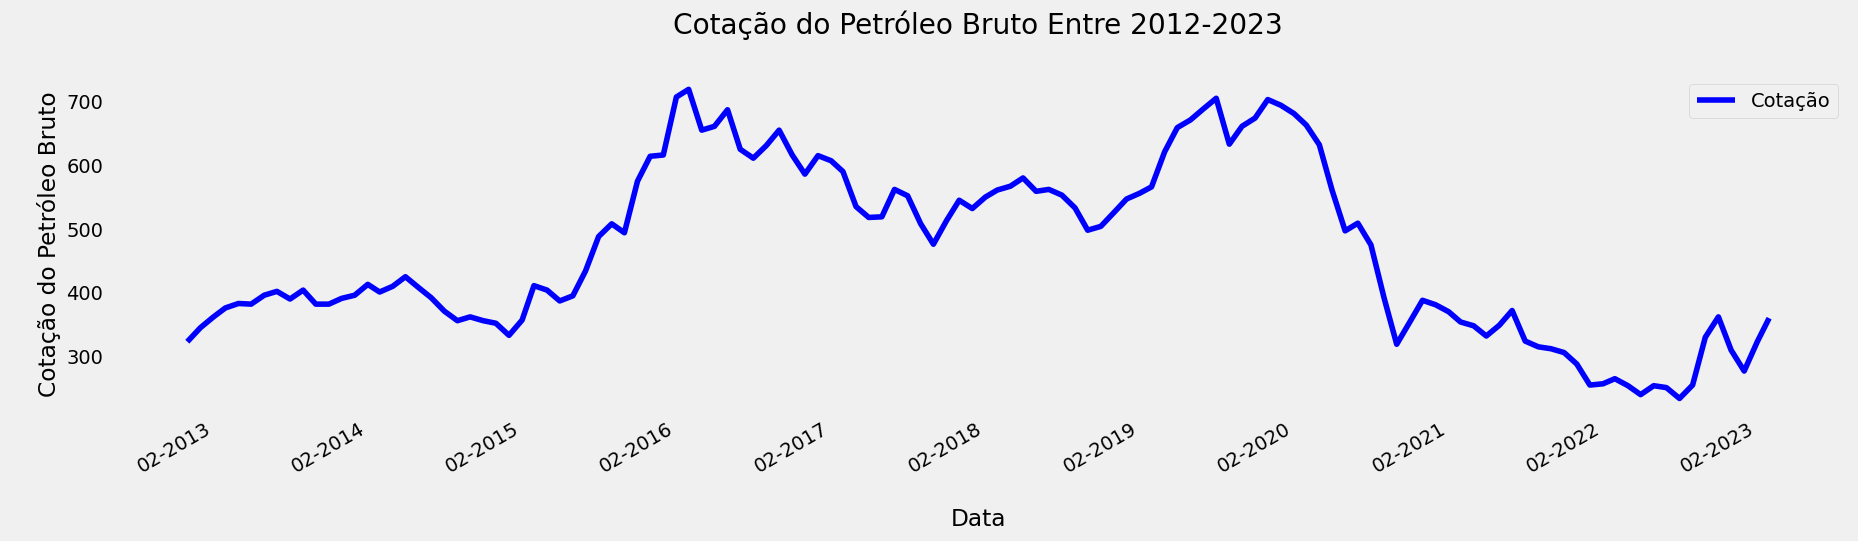

In [14]:
# Plot
plt.figure(figsize = (20,5))
plt.grid()
plt.plot(df.index, df['petroleo_bruto'], color = 'blue')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gcf().autofmt_xdate()
plt.legend(['Cotação'], loc='best')
plt.title('Cotação do Petróleo Bruto Entre 2012-2023\n')
plt.ylabel('\nCotação do Petróleo Bruto')
plt.xlabel('\nData')

arquitetura long short term memory(lstm)

##PREPROCESSAMENTO DOS DADOS

In [15]:
# Proporção de dados para treino e teste
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size


In [16]:
# Define o tamanho das amostras
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [17]:
print('Tamanho da Amostra de Treino:', len(train))
print('Tamanho da Amostra de Teste:', len(test))

Tamanho da Amostra de Treino: 99
Tamanho da Amostra de Teste: 25


In [18]:
print(train.shape)
train.head()

(99, 11)


,petroleo_bruto,minerio_ferro,ouro,arroz,feijao,milho,soja,trigo,cafe,algodao,umidade
data,,,,,,,,,,,
2012-12-01,323,455,3102.61,423.45,844.0,468.0,578.0,28.67,207.70504,117.7,79.261905
2013-01-01,345,546,3100.45,415.85,799.0,485.0,557.0,24.49,228.94287,4.5,82.193548
2013-02-01,362,595,3199.41,410.77,718.0,466.0,552.0,22.06,238.41747,25.1,74.839286
2013-03-01,376,636,3281.67,414.82,614.0,442.0,574.0,21.64,218.47599,53.6,77.935484
2013-04-01,383,738,3261.65,451.04,619.0,429.0,595.0,22.30,226.15010,166.0,80.450000


In [19]:
# Variáveis preditoras
variaveis_preditoras = ['minerio_ferro',
                        'ouro',
                        'arroz',
                        'feijao',
                        'milho',
                        'soja',
                        'trigo',
                        'cafe',
                        'algodao',
                        'umidade']

In [20]:
# Prepara o padronizador das variáveis preditoras
scaler_preditores = MinMaxScaler()

In [21]:
# Fit nos dados de treino
scaler_preditores = scaler_preditores.fit(train[variaveis_preditoras].to_numpy())

In [22]:
# Transform nos dados de treino
train.loc[:, variaveis_preditoras] = scaler_preditores.transform(train[variaveis_preditoras].to_numpy())

In [23]:
train.head()

,petroleo_bruto,minerio_ferro,ouro,arroz,feijao,milho,soja,trigo,cafe,algodao,umidade
data,,,,,,,,,,,
2012-12-01,323,0.112288,0.140918,0.010736,0.528090,0.253193,0.023302,0.109026,0.617026,0.366984,0.843364
2013-01-01,345,0.305085,0.140327,0.004301,0.443820,0.306536,0.009321,0.044200,0.815738,0.007619,0.983088
2013-02-01,362,0.408898,0.167408,0.000000,0.292135,0.246917,0.005992,0.006514,0.904388,0.073016,0.632580
2013-03-01,376,0.495763,0.189919,0.003429,0.097378,0.171609,0.020639,0.000000,0.717805,0.163492,0.780147
2013-04-01,383,0.711864,0.184440,0.034095,0.106742,0.130817,0.034621,0.010236,0.789608,0.520317,0.899990


In [24]:
# Transform nos dados de teste
test.loc[:, variaveis_preditoras] = scaler_preditores.transform(test[variaveis_preditoras].to_numpy())

In [25]:
test.head()

,petroleo_bruto,minerio_ferro,ouro,arroz,feijao,milho,soja,trigo,cafe,algodao,umidade
data,,,,,,,,,,,
2021-03-01,354,0.637712,0.194855,0.382454,0.381292,-0.039662,0.493342,0.455180,0.707023,0.548889,0.265874
2021-04-01,348,0.533898,0.264388,0.393951,0.213633,-0.054975,0.597870,0.515974,0.732180,0.017143,0.437683
2021-05-01,332,0.400424,0.246417,0.453802,0.235262,-0.092159,0.606525,0.530397,0.708895,0.444127,0.349664
2021-06-01,349,0.317797,0.234308,0.509834,0.320749,-0.074743,0.631824,0.593207,0.808476,0.181905,0.645800
2021-07-01,372,0.313559,0.223422,0.526454,0.426610,-0.066114,0.773462,0.641749,0.866202,0.436825,0.577974


In [26]:
# Padronizador da variável alvo
scaler_target = MinMaxScaler()

In [27]:
# Fit nos dados de treino
scaler_target = scaler_target.fit(train[['petroleo_bruto']])

In [28]:
# Transform nos dados de treino
train['petroleo_bruto'] = scaler_target.transform(train[['petroleo_bruto']])

In [29]:
train['petroleo_bruto'].head()

data
2012-12-01    0.0100
2013-01-01    0.0650
2013-02-01    0.1075
2013-03-01    0.1425
2013-04-01    0.1600
Name: petroleo_bruto, dtype: float64

In [30]:
# Transform nos dados de teste
test['petroleo_bruto'] = scaler_target.transform(test[['petroleo_bruto']])

In [31]:
test['petroleo_bruto'].head()

data
2021-03-01    0.0875
2021-04-01    0.0725
2021-05-01    0.0325
2021-06-01    0.0750
2021-07-01    0.1325
Name: petroleo_bruto, dtype: float64

In [32]:
# Função para criar o dataset final
def createDataset(X, y, time_steps):

    Xs, ys = [], []

    for i in range(len(X) - time_steps):
        data = X.iloc[i:(i + time_steps)].values
        Xs.append(data)
        ys.append(y.iloc[i + time_steps])

    return np.array(Xs), np.array(ys)

In [33]:
time_steps = 3

In [34]:
X_train, y_train = createDataset(train, train.petroleo_bruto, time_steps)

In [35]:
X_test, y_test = createDataset(test, test.petroleo_bruto, time_steps)

In [36]:
print(X_train.shape, y_train.shape)

(96, 3, 11) (96,)


In [37]:
print(X_test.shape, y_test.shape)

(22, 3, 11) (22,)


#MODELAGEM COM LSTM

In [39]:
# Cria o modelo
modelo_lstm = tf.keras.Sequential()
modelo_lstm.add(tf.keras.layers.LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
#numero de unidades e dados de entrada para o treino
modelo_lstm.add(tf.keras.layers.Dropout(rate = 0.2))
#como esse modelo aprende bastante mas pode nao ser bom, por isso
#fazer o dropout é quase a regra para nao gerar overfitting
modelo_lstm.add(tf.keras.layers.Dense(units = 1))


In [40]:
# Compila o modelo
modelo_lstm.compile(loss = 'mse', optimizer = 'adam')
#calcula do erro quadratico medio, e o otimizador adam.

In [41]:
modelo_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               71680     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 71,809
Trainable params: 71,809
Non-trainable params: 0
_________________________________________________________________


In [42]:
%%time
modelo_lstm_history = modelo_lstm.fit(X_train,
                                      y_train,
                                      epochs = 100,
                                      batch_size = 32,
                                      validation_split = 0.1,
                                      shuffle = False)

Epoch 1/100
3/3 [==============================] - 4s 306ms/step - loss: 0.2194 - val_loss: 0.0386
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0856 - val_loss: 0.0720
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0421 - val_loss: 0.1433
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0571 - val_loss: 0.1950
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0773 - val_loss: 0.1860
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0640 - val_loss: 0.1420
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0487 - val_loss: 0.1004
Epoch 8/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0397 - val_loss: 0.0728
Epoch 9/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0391 - val_loss: 0.0594
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0371 - val_loss: 0.0561
Epoch 11/100
3/3 [

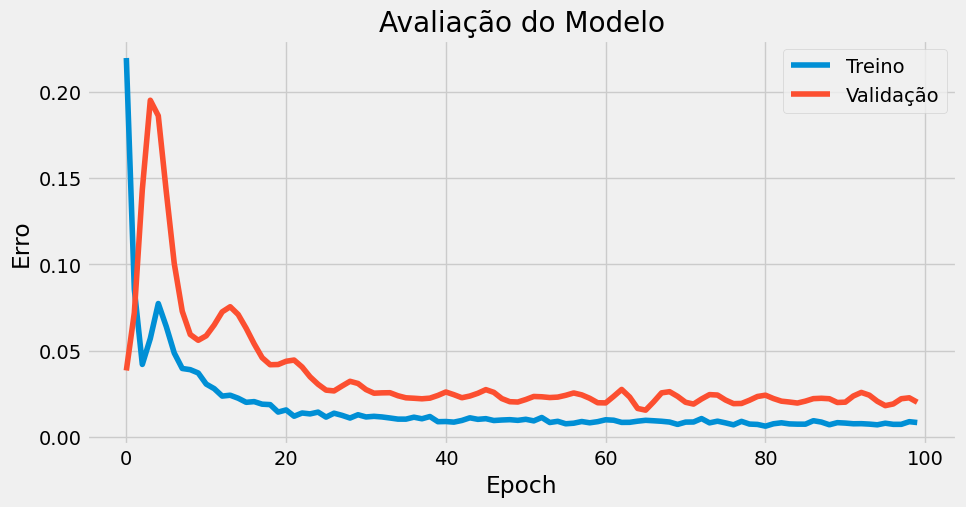

In [43]:
# Plot
plt.plot(modelo_lstm_history.history['loss'])
plt.plot(modelo_lstm_history.history['val_loss'])
plt.title('Avaliação do Modelo')
plt.ylabel('Erro')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper right')
plt.show()

#PREVISÕES COM DADOS DE TESTE


In [44]:
y_pred = modelo_lstm.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [45]:
y_pred

array([[ 0.10541621],
       [ 0.12599736],
       [ 0.13321249],
       [ 0.13558628],
       [ 0.08504157],
       [ 0.04992924],
       [ 0.03246308],
       [ 0.03082538],
       [-0.01792543],
       [-0.03937156],
       [-0.04490944],
       [-0.0347866 ],
       [-0.02148743],
       [-0.00858986],
       [ 0.012671  ],
       [ 0.00324323],
       [-0.02701429],
       [-0.02322508],
       [ 0.07471573],
       [ 0.16230573],
       [ 0.14805622],
       [ 0.08275118]], dtype=float32)

In [46]:
# Invertemos a escala para visualizar o valor real e a previsão
y_train_inv = scaler_target.inverse_transform(y_train.reshape(1, -1))
y_test_inv = scaler_target.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = scaler_target.inverse_transform(y_pred.reshape(1,-1))

In [47]:
# Ajusta o shape
y_train_inv = y_train_inv.flatten()
y_test_inv = y_test_inv.flatten()
y_pred_inv = y_pred_inv.flatten()

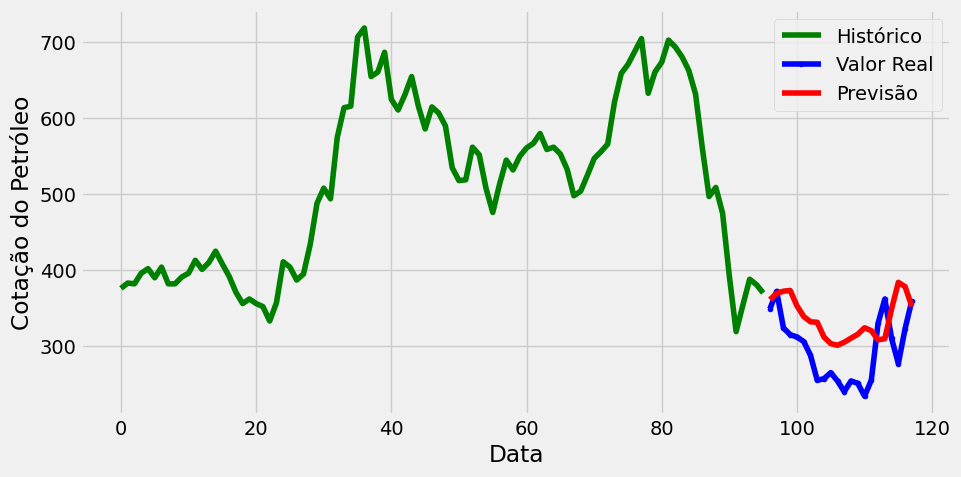

In [48]:
# Plot
plt.plot(np.arange(0, len(y_train)),
         y_train_inv,
         color = 'green',
         label = "Histórico")

plt.plot(np.arange(len(y_train),
                   len(y_train) + len(y_test)),
         y_test_inv,
         color = 'blue',
         marker = '.',
         label = "Valor Real")

plt.plot(np.arange(len(y_train),
                   len(y_train) + len(y_test)),
         y_pred_inv,
         color = 'red',
         label = "Previsão")

plt.ylabel('Cotação do Petróleo')
plt.xlabel('Data')
plt.legend()
plt.show();

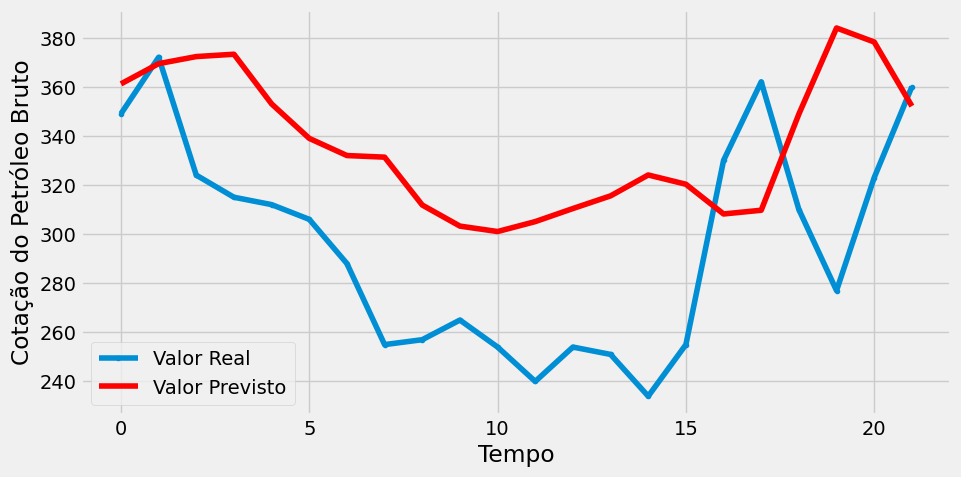

In [49]:
# Plot apenas do valor real x valor previsto
plt.plot(y_test_inv, marker = '.', label = "Valor Real")
plt.plot(y_pred_inv, color = 'red', label = "Valor Previsto")
plt.ylabel('Cotação do Petróleo Bruto')
plt.xlabel('Tempo')
plt.legend()
plt.show();

##AVALIAÇÃO

usaremos as mesmas métricas usadas na versao do modelo MLP.

In [50]:
# Mean Directional Accuracy
def mda(actual: np.ndarray, predicted: np.ndarray):
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [51]:
# Imprime as métricas

MDA_lstm = mda(y_test_inv, y_pred_inv)
print('MDA:', MDA_lstm)

MAE_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
print('MAE:', MAE_lstm)

MSE_lstm = mean_squared_error(y_test_inv, y_pred_inv)
print('MSE:', MSE_lstm)

RMSE_lstm = mean_squared_error(y_test_inv, y_pred_inv, squared = False)
print('RMSE:', RMSE_lstm)

EVS_lstm = explained_variance_score(y_test_inv, y_pred_inv)
print('EVS Score:', EVS_lstm)

MDA: 0.38095238095238093
MAE: 49.09794061834162
MSE: 3014.4659991196186
RMSE: 54.90415284037828
EVS Score: 0.2742543188923017


Mudar apenas a arquitetura talvez não seja suficiente. pois o modelo MLP com esses dados foi melhor já que a analise multivariada é muito complexo. É preciso observar e experimentar outros hiperparametros pq só mudando a arquitetura não logramos exito.

alternativas:
* modificar o preprocessamento
* treinar por mais tempo
* ajustar os hiperparametros
* testar outra arquitetura

In [ ]:
# Salva o modelo
def save_model(model):
    json_model = model.to_json()
    open('modelos/modelo_lstm.json', 'w').write(json_model)
    model.save_weights('modelos/modelo_lstm.h5', overwrite = True)

In [ ]:
save_model(modelo_lstm)


#ARQUITETURA GRU COMO ALTERNATIVA

GATED RECURRENT UNIT são uma arquitetura de rede neural recorrente(rnn) e foram desenvolvidas como uma simplificação das lstm para lidar com os problemas de dependências de longo prazo e desaparecimento do gradiente, comumente encontrados em RNN tradicionais. As grus tambem sao uteis para tarefas envolvendo sequencias, como processamento de linguagem natural, reconhecimento de fala e series temporais.

A arquitetura gru é composta de unidades recorrentes com dois portões: o portão de atualização (update gate) e o portão de redefinição(reset gate). Esses portões controlam o fluxo de informações dentro da unidade e permitem que a gru aprenda a capturar dependencias de longo prazo.


portao de atualização(update gate): controla a proporção de informações do estado oculto anterior que deve ser mantida e a proporção de informações do estado oculto atual candidato que deve ser adicionada ao novo estado oculto. ele usa uma camada sigmoide apra calcular a importancia das informaç~eos no estado oculto anterior e no estado oculto candidato.

portao de redefinição (reset gate): controla a quantidade de informações do estado oculto anterior que devem ser consideradas ao calcular o estado oculto candidato. ele usa uma camada sigmoide para calcular a importancia das informações no estado oculto anterior.

estado oculto candidato: o estado oculto candidato é calculado usando uma combinação ponderada do estado oculto anterior (modulado pelo portao de redefinição ) e a entrada atual, passando-os por uma camada tanh.

novo estado oculto: o novo estado oculto é uma combinação do estado oculto anterior e do estado oculto candidato, ponderada pelos valores do portao de atualização. Isso permite que a gru retenha informações relevantes de longo prazo e descarte informações irrelevantes.

A principal diferença entre grus e lstms é simplificação da arquitetura. As grus tem dois portões em vez de tres e nao possuem uma unidade de memoria separada (estado da celula). Essa simplificação pode resultar em um menor custo computacional e de memoria em comparaçao às lstms, embora possa haver trade-offs em termos de desempenho, dependendo da tarefa especifica.

Assim como as lstms, as grus podem ser usadas em varias configurações, como unidirecionais, bidirecionais ou empilhadas (stacked), para se adaptarem a diferentes problemas de processamento de sequencias.

##MODELAGEM COM GRU

In [52]:
# Cria o modelo
modelo_gru = tf.keras.Sequential()
modelo_gru.add(tf.keras.layers.GRU(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
modelo_gru.add(tf.keras.layers.Dropout(rate = 0.2))
modelo_gru.add(tf.keras.layers.Dense(units = 1))

In [53]:
# Compila o modelo
modelo_gru.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [54]:
modelo_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               54144     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 54,273
Trainable params: 54,273
Non-trainable params: 0
_________________________________________________________________


##TREINAMENTO DO MODELO

In [55]:
%%time
modelo_gru_history = modelo_gru.fit(X_train,
                                    y_train,
                                    epochs = 100,
                                    batch_size = 32,
                                    validation_split = 0.1,
                                    shuffle = False)

Epoch 1/100
3/3 [==============================] - 4s 275ms/step - loss: 0.4420 - val_loss: 0.0510
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 0.1237 - val_loss: 0.0481
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0454 - val_loss: 0.1593
Epoch 4/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0929 - val_loss: 0.2299
Epoch 5/100
3/3 [==============================] - 0s 42ms/step - loss: 0.1196 - val_loss: 0.1947
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0824 - val_loss: 0.1214
Epoch 7/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0570 - val_loss: 0.0677
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0422 - val_loss: 0.0419
Epoch 9/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0475 - val_loss: 0.0332
Epoch 10/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0424 - val_loss: 0.0351
Epoch 11/100
3/3 [

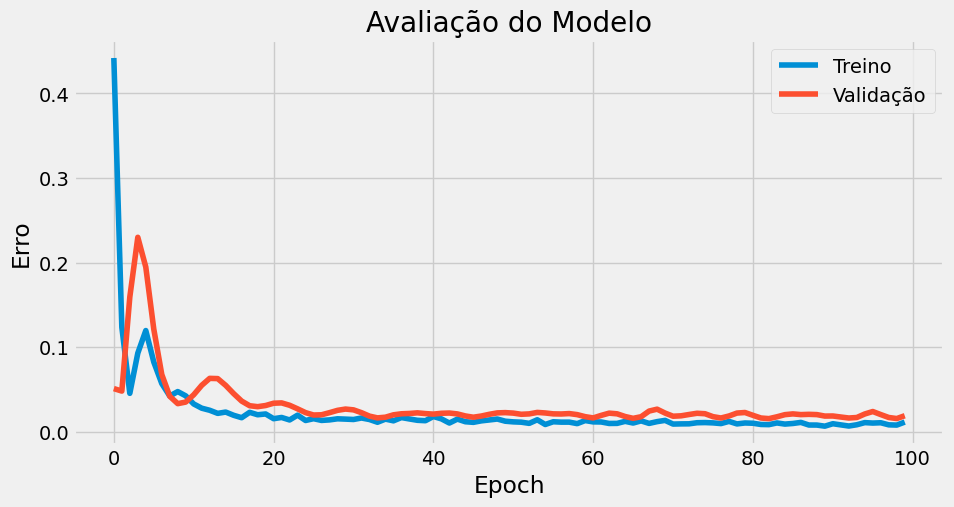

In [56]:
# Plot
plt.plot(modelo_gru_history.history['loss'])
plt.plot(modelo_gru_history.history['val_loss'])
plt.title('Avaliação do Modelo')
plt.ylabel('Erro')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper right')
plt.show()

#PREVISÕES COM DADOS DE TESTE

In [57]:
y_pred = modelo_gru.predict(X_test)

1/1 [==============================] - 1s 583ms/step


In [59]:
y_pred

array([[ 0.12710002],
       [ 0.1492387 ],
       [ 0.16639121],
       [ 0.15134916],
       [ 0.08791024],
       [ 0.05432202],
       [ 0.03210741],
       [ 0.03439682],
       [ 0.0085359 ],
       [ 0.00224608],
       [-0.00783152],
       [-0.0046625 ],
       [ 0.01316349],
       [ 0.04039791],
       [ 0.07150589],
       [ 0.04373775],
       [-0.01443186],
       [-0.01099275],
       [ 0.12204019],
       [ 0.20002067],
       [ 0.1817775 ],
       [ 0.1343876 ]], dtype=float32)

#INVERTENDO A ESCALA

In [60]:
# Invertemos a escala para visualizar o valor real e a previsão
y_train_inv = scaler_target.inverse_transform(y_train.reshape(1, -1))
y_test_inv = scaler_target.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = scaler_target.inverse_transform(y_pred.reshape(1,-1))

In [62]:
# Ajusta o shape
y_train_inv = y_train_inv.flatten()
#transforma a matriz em um objeto unidimensional
y_test_inv = y_test_inv.flatten()
y_pred_inv = y_pred_inv.flatten()

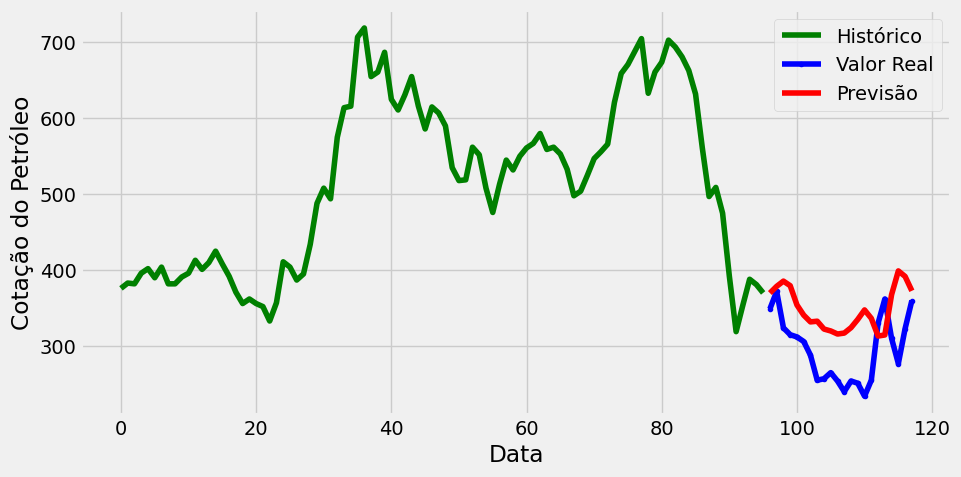

In [63]:
# Plot
plt.plot(np.arange(0, len(y_train)),
         y_train_inv,
         color = 'green',
         label = "Histórico")

plt.plot(np.arange(len(y_train),
                   len(y_train) + len(y_test)),
         y_test_inv,
         color = 'blue',
         marker = '.',
         label = "Valor Real")

plt.plot(np.arange(len(y_train),
                   len(y_train) + len(y_test)),
         y_pred_inv,
         color = 'red',
         label = "Previsão")

plt.ylabel('Cotação do Petróleo')
plt.xlabel('Data')
plt.legend()
plt.show();

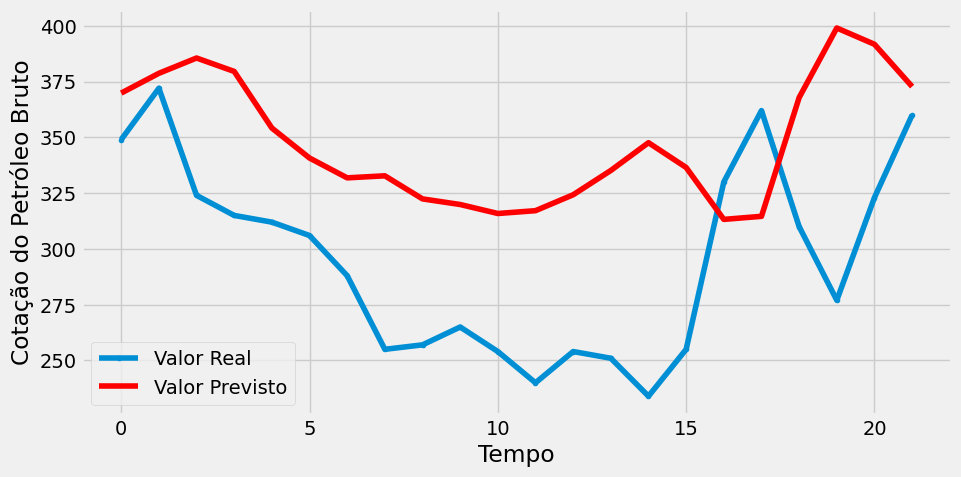

In [64]:
# Plot apenas do valor real x valor previsto
plt.plot(y_test_inv, marker = '.', label = "Valor Real")
plt.plot(y_pred_inv, color = 'red', label = "Valor Previsto")
plt.ylabel('Cotação do Petróleo Bruto')
plt.xlabel('Tempo')
plt.legend()
plt.show();

In [65]:
# Mean Directional Accuracy
def mda(actual: np.ndarray, predicted: np.ndarray):
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [66]:
# Imprime as métricas

MDA_gru = mda(y_test_inv, y_pred_inv)
print('MDA:', MDA_gru)

MAE_gru = mean_absolute_error(y_test_inv, y_pred_inv)
print('MAE:', MAE_gru)

MSE_gru = mean_squared_error(y_test_inv, y_pred_inv)
print('MSE:', MSE_gru)

RMSE_gru = mean_squared_error(y_test_inv, y_pred_inv, squared = False)
print('RMSE:', RMSE_gru)

EVS_gru = explained_variance_score(y_test_inv, y_pred_inv)
print('EVS Score:', EVS_gru)

MDA: 0.38095238095238093
MAE: 58.47380482066762
MSE: 4257.447557797233
RMSE: 65.24911921089229
EVS Score: 0.17009427476956973


#A métrica observada, principalmente, é a MSE e a RMSE.

E foi observado que houve uma piora no modelo gru comparado ao lstm e ainda pior comparado ao MLP.

#CNN

convolutional neural network (CNNs) sao uma classe de redes neurais profundas projetadas para lidar com dados estruturados em grade, como imagens, que sao inerentemente multidimensionais.
é composta de uma serie de camadas alternadas que realizam convoluções e pooling, seguidas por uma ou mais camadas totalmente conectadas (dense layers). As principais camadas em uma Cnn SÃO:

CAMADAS convolucionais: apos a convolução, uma função de ativação é aplicada aos mapas de caracteristicas. a função de ativação introduz nao-linearidade na rede, permitindo que ela aprenda representações mais complexas. a função de ativaçaõ mais comum em cnns é a reLU, que tem a propriedade de ser computacionalmente eficiente e ajudar a mitigar o problema do desaparecimento do gradiente.

camadas de pooling: as camadas de pooling (também conhecidas como subsampling) sao usadas para reduzir a dimensionalidade espacial dos mapas de caracteristicas, tornando a rede mais eficiente em termos computacionais e de memoria, e ajudando a torna-la invariante a pequenas mudanças na posição dos objetos na imagem. o poolling mais comum é o max-pooling, que seleciona o valor maximo em uma janela deslizante aplicada ao mapa de caracteristicas.

Camadas totalmente conectadas: Após várias camadas convolucionais e de pooling, uma ou  mais  camadas  totalmente  conectadas  (dense  layers)  são usadas  para  classificação  ou regressão.  

##**A  última  camada  totalmente  conectada  geralmente  usa  uma  função  de  ativação softmax para CLASSIFICAÇÃO ou uma função de ativação linear para REGRESSÃO.**

Camada de dropout (opcional): A camada de dropout é uma técnica de regularização que pode  ser  aplicada  entre  camadas  totalmente  conectadas  para  reduzir  o  risco  de  sobreajuste (overfitting).  Durante  o  treinamento,  a  camada  de  dropout  "desliga"  aleatoriamente  um percentual  de  neurônios,  forçando  a  rede  a  aprender  representações  mais  robustas  e  menos dependentes de neurônios individuais.



## MODELAGEM COM CNN


In [68]:
# Cria o modelo
modelo_cnn = tf.keras.Sequential()#igual para todos
modelo_cnn.add(tf.keras.layers.Conv1D(filters = 64, #conv1d para tabelas simples
                                      kernel_size = 2,
                                      activation = 'relu',
                                      input_shape = (X_test.shape[1], X_test.shape[2])))
modelo_cnn.add(tf.keras.layers.MaxPooling1D(pool_size = 2))
modelo_cnn.add(tf.keras.layers.Flatten())#transforma em vetor
modelo_cnn.add(tf.keras.layers.Dense(50, activation = 'relu'))
modelo_cnn.add(tf.keras.layers.Dense(32, activation = 'relu'))
modelo_cnn.add(tf.keras.layers.Dense(1))
#max-pooling:sao usadas para reduzir a dimensionalidade espacial dos mapas
#de caracteristicas, tornando a rede mais eficiente em termos computacionais
#e de memoria, e ajudando a torna-la invariante a pequenas mudanças
#na posição dos objetos na imagem

In [69]:
modelo_cnn.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [70]:
modelo_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2, 64)             1472      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                3250      
                                                                 
 dense_7 (Dense)             (None, 32)                1632      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                      

#TREINAMENTO DO MODELO

In [71]:
%%time
modelo_cnn_history = modelo_cnn.fit(X_train,
                                    y_train,
                                    epochs = 100,
                                    batch_size = 32,
                                    validation_split = 0.1,
                                    shuffle = False)

Epoch 1/100
3/3 [==============================] - 2s 203ms/step - loss: 0.1382 - mse: 0.1382 - val_loss: 0.0529 - val_mse: 0.0529
Epoch 2/100
3/3 [==============================] - 0s 56ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0882 - val_mse: 0.0882
Epoch 3/100
3/3 [==============================] - 0s 67ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.1441 - val_mse: 0.1441
Epoch 4/100
3/3 [==============================] - 0s 48ms/step - loss: 0.0358 - mse: 0.0358 - val_loss: 0.1658 - val_mse: 0.1658
Epoch 5/100
3/3 [==============================] - 0s 36ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.1398 - val_mse: 0.1398
Epoch 6/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.1003 - val_mse: 0.1003
Epoch 7/100
3/3 [==============================] - 0s 51ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0708 - val_mse: 0.0708
Epoch 8/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0156 - mse: 0.0

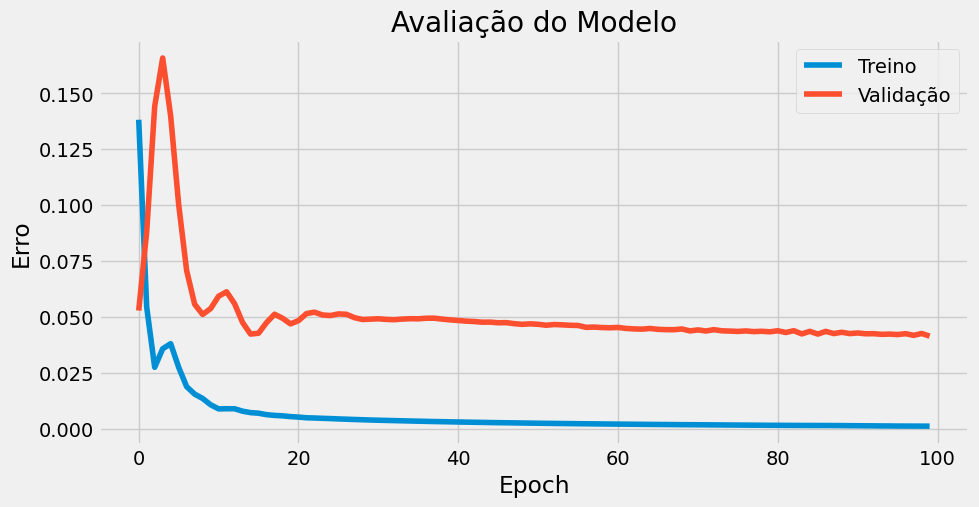

In [72]:
# Plot
plt.plot(modelo_cnn_history.history['loss'])
plt.plot(modelo_cnn_history.history['val_loss'])
plt.title('Avaliação do Modelo')
plt.ylabel('Erro')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper right')
plt.show()

In [73]:
y_pred = modelo_cnn.predict(X_test)

1/1 [==============================] - 0s 341ms/step


In [74]:
y_pred


array([[0.29918545],
       [0.27076802],
       [0.31219336],
       [0.32738575],
       [0.3108235 ],
       [0.29194146],
       [0.28037944],
       [0.26519924],
       [0.27952796],
       [0.25318488],
       [0.2540526 ],
       [0.26548916],
       [0.2388894 ],
       [0.28633636],
       [0.29853702],
       [0.2706057 ],
       [0.24894758],
       [0.27909195],
       [0.26709688],
       [0.3168494 ],
       [0.23748565],
       [0.30286103]], dtype=float32)

In [75]:
# Invertemos a escala para visualizar o valor real e a previsão
y_train_inv = scaler_target.inverse_transform(y_train.reshape(1, -1))
y_test_inv = scaler_target.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = scaler_target.inverse_transform(y_pred.reshape(1,-1))

In [76]:
# Ajusta o shape
y_train_inv = y_train_inv.flatten()
y_test_inv = y_test_inv.flatten()
y_pred_inv = y_pred_inv.flatten()

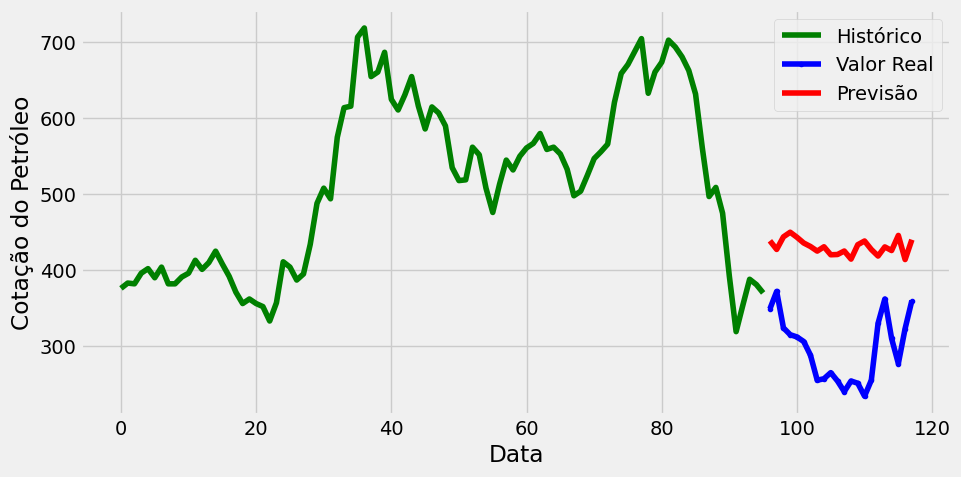

In [77]:
# Plot
plt.plot(np.arange(0, len(y_train)),
         y_train_inv,
         color = 'green',
         label = "Histórico")

plt.plot(np.arange(len(y_train),
                   len(y_train) + len(y_test)),
         y_test_inv,
         color = 'blue',
         marker = '.',
         label = "Valor Real")

plt.plot(np.arange(len(y_train),
                   len(y_train) + len(y_test)),
         y_pred_inv,
         color = 'red',
         label = "Previsão")

plt.ylabel('Cotação do Petróleo')
plt.xlabel('Data')
plt.legend()
plt.show();

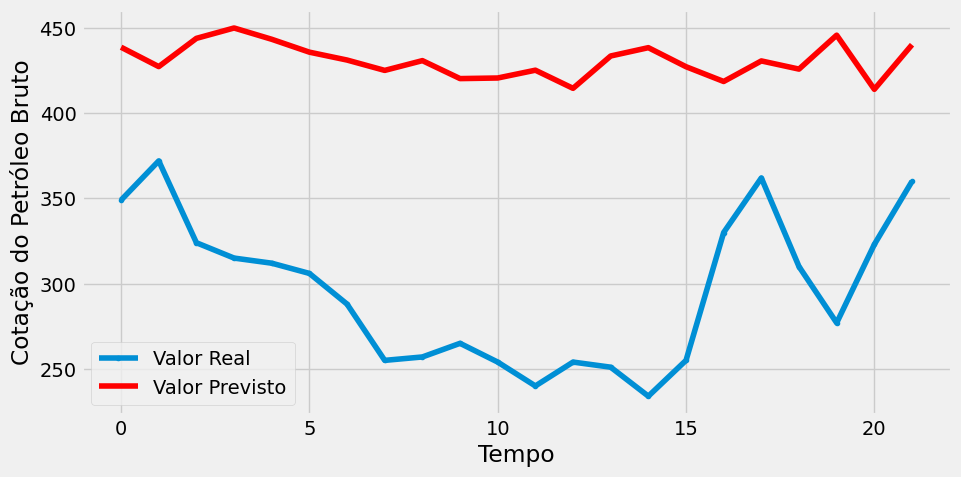

In [78]:
# Plot apenas do valor real x valor previsto
plt.plot(y_test_inv, marker = '.', label = "Valor Real")
plt.plot(y_pred_inv, color = 'red', label = "Valor Previsto")
plt.ylabel('Cotação do Petróleo Bruto')
plt.xlabel('Tempo')
plt.legend()
plt.show();

#METRICAS DE AVALIAÇÃO



In [79]:
# Mean Directional Accuracy
def mda(actual: np.ndarray, predicted: np.ndarray):
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [80]:
# Imprime as métricas

MDA_cnn = mda(y_test_inv, y_pred_inv)
print('MDA:', MDA_cnn)

MAE_cnn = mean_absolute_error(y_test_inv, y_pred_inv)
print('MAE:', MAE_cnn)

MSE_cnn = mean_squared_error(y_test_inv, y_pred_inv)
print('MSE:', MSE_cnn)

RMSE_cnn = mean_squared_error(y_test_inv, y_pred_inv, squared = False)
print('RMSE:', RMSE_cnn)

EVS_cnn = explained_variance_score(y_test_inv, y_pred_inv)
print('EVS Score:', EVS_cnn)

MDA: 0.38095238095238093
MAE: 135.80602888627485
MSE: 20148.849309859503
RMSE: 141.94664247476763
EVS Score: 0.0477612036992765


#CNN não performou bem com este conjunto de dados. CNN geralmente, não é ideal para series temporais.

Mas o papel do cientista de dados é comprovar as hipoteses.

Aqui conseguimos refutar a hipotese nula que CNN poderia servir para series temporais.